In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##### sample mean
$ \overline{X}_N= ( 1- \frac{1.0}{N}) \times \overline{X}_{N-1} + (\frac{1.0}{N} ) \times x $

In [6]:
class Bandit:
    def __init__(self, m):
        self.m = m
        self.mean = 0
        self.N = 0
     
    # simulate pulling bandit arms 
    def pull(self):
        return np.random.randn() + self.m
    
    def update(self, x):
        self.N += 1
        self.mean = (1 - 1.0/self.N) * self.mean + (1/self.N) * x

In [7]:
def run_experiment_eps(m1, m2, m3, epsilon, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    
    for i in range(N):
        p =  np.random.random()
        
        if p < epsilon :
            j = np.random.choice(3)
        else :
            j = np.argmax([b.mean for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x    # end of loop
    
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    plt.plot(cumulative_average)
    
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average

In [8]:
def ucb(mean, n, n_j):
    if n_j == 0:
        return float('inf')
    return mean + np.sqrt(2 * np.log(n) / n_j)

In [9]:
def run_experiment_ucb(m1, m2, m3, N):
    bandits = [Bandit(m1), Bandit(m2), Bandit(m3)]
    data = np.empty(N)
    
    for i in range(N):

        j = np.argmax([ucb(b.mean, i, b.N) for b in bandits])
        
        x = bandits[j].pull()
        bandits[j].update(x)
        
        # for the plot
        data[i] = x    # end of loop
    
    cumulative_average = np.cumsum(data)/(np.arange(N) + 1)
    plt.plot(cumulative_average)
    
    plt.plot(np.ones(N) * m1)
    plt.plot(np.ones(N) * m2)
    plt.plot(np.ones(N) * m3)
    plt.xscale('log')
    plt.show()
    
    for b in bandits:
        print(b.mean)
        
    return cumulative_average

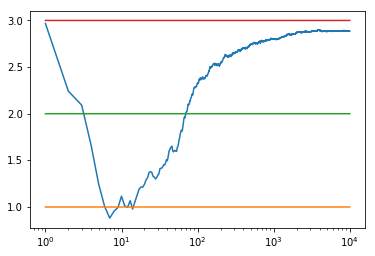

1.0126381837857656
1.9084790741427395
2.9976952500869394


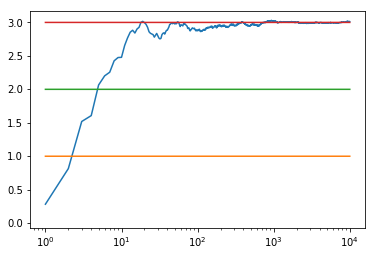

-0.05845354768338157
2.004323979488049
3.0152063258813135


In [10]:
if __name__ == '__main__':
    e_eps = run_experiment_eps(1.0, 2.0, 3.0, 0.1, 10000)
    e_ucb = run_experiment_ucb(1.0, 2.0, 3.0, 10000)

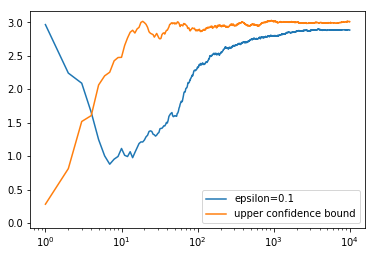

In [11]:
#log scale plot
plt.plot(e_eps, label='epsilon=0.1')
plt.plot(e_ucb, label='upper confidence bound')

plt.legend()
plt.xscale('log')
plt.show()

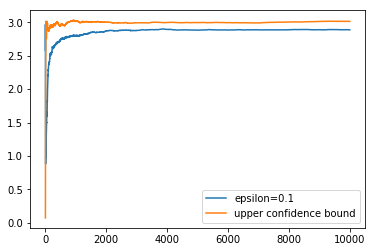

In [12]:
#linear scale plot
plt.plot(e_eps, label='epsilon=0.1')
plt.plot(e_ucb, label='upper confidence bound')

plt.legend()
plt.show()